<a href="https://colab.research.google.com/github/Saravanan7260/saru/blob/main/vac_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recognition of Tamil Actors using SVM**

**A1-Import system Libraries**

In [163]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
kalai=os.listdir("/content/drive/MyDrive/Kalai")
saru=os.listdir("/content/drive/MyDrive/Saru")
rakss=os.listdir("/content/drive/MyDrive/Rakss")

In [85]:
limit=10
kalai_images=[None]*limit
j=0
for i in kalai:
 if(j<limit):
   kalai_images[j]=imread("/content/drive/MyDrive/Kalai/"+i)
   j+=1
 else:
    break

In [86]:
limit=10
saru_images=[None]*limit
j=0
for i in saru:
 if(j<limit):
   saru_images[j]=imread("/content/drive/MyDrive/Saru/"+i)
   j+=1
 else:
    break

In [87]:
limit=10
rakss_images=[None]*limit
j=0
for i in rakss:
 if(j<limit):
   rakss_images[j]=imread("/content/drive/MyDrive/Rakss/"+i)
   j+=1
 else:
    break

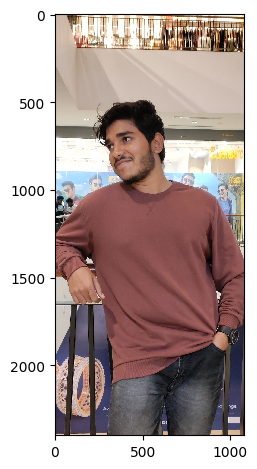

In [88]:
imshow(kalai_images[8])

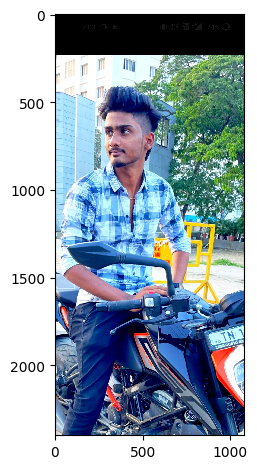

In [89]:
imshow(saru_images[4])

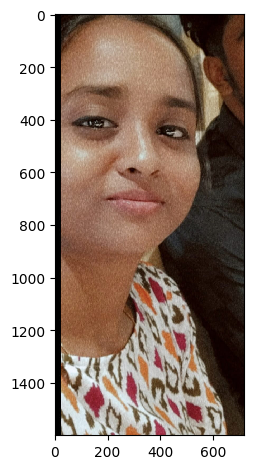

In [90]:
imshow(rakss_images[2])

In [91]:
kalai_gray=[None]*limit
j=0
for i in kalai:
 if(j<limit):
  kalai_gray[j]=rgb2gray(kalai_images[j])
  j+=1
 else:
  break

In [92]:
saru_gray=[None]*limit
j=0
for i in saru:
   if(j<limit):
      saru_gray[j]=rgb2gray(saru_images[j])
      j+=1
   else:
      break

In [93]:
rakss_gray=[None]*limit
j=0
for i in rakss:
   if(j<limit):
      rakss_gray[j]=rgb2gray(rakss_images[j])
      j+=1
   else:
      break

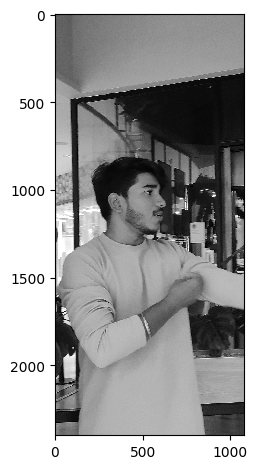

In [94]:
imshow(kalai_gray[4])

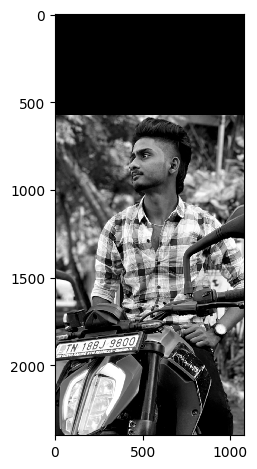

In [95]:
imshow(saru_gray[2])

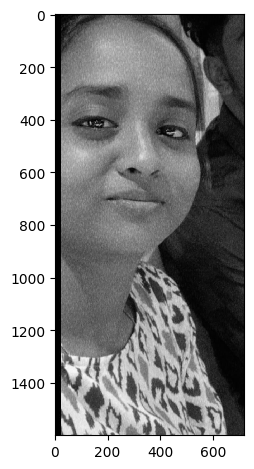

In [96]:
imshow(rakss_gray[2])

In [97]:
saru_gray[1]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.78009451, 0.78401608, 0.78009451, ..., 0.74480039, 0.74480039,
        0.74087882],
       [0.78009451, 0.78009451, 0.78009451, ..., 0.74872196, 0.74872196,
        0.75264353],
       [0.78401608, 0.78401608, 0.78009451, ..., 0.74872196, 0.74872196,
        0.74480039]])

In [98]:
kalai_gray[4].shape

(2400, 1080)

In [99]:
saru_gray[4].shape

(2400, 1080)

In [100]:
rakss_gray[4].shape

(1600, 720)

In [101]:
for j in range (10):
                 rk=kalai_gray[j]
                 kalai_gray[j]=resize(rk,(512,512))  

In [102]:
for j in range (10):
  g=rakss_gray[j]
  rakss_gray[j]=resize(g,(512,512))

In [103]:
for j in range (10):
 k=saru_gray[j]
 saru_gray[j]=resize(k,(512,512))

In [104]:
kalai_gray[4].shape

(512, 512)

In [105]:
rakss_gray[4].shape

(512, 512)

In [106]:
saru_gray[4].shape

(512, 512)

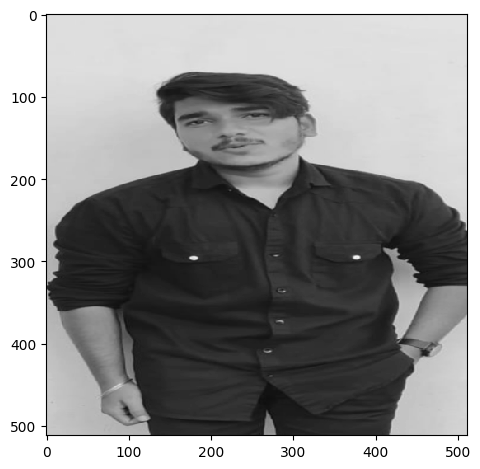

In [107]:
imshow(kalai_gray[1])

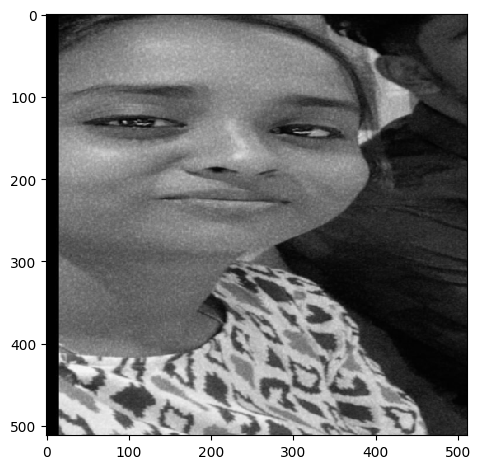

In [108]:
imshow(rakss_gray[2])

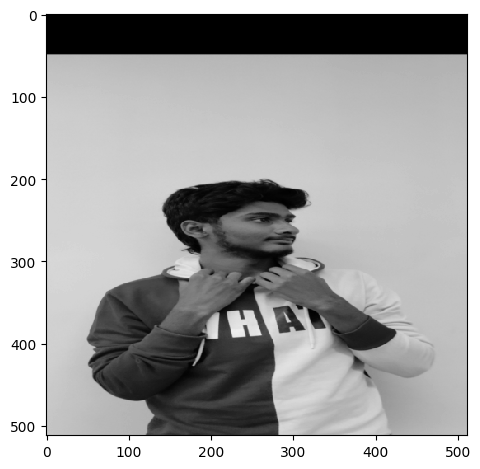

In [109]:
imshow(saru_gray[1])

In [114]:
len_of_images_kalai=len(kalai_gray)
image_size_kalai=kalai_gray[1].shape
image_size_kalai

(512, 512)

In [115]:
flatten_size_kalai=image_size_kalai[0]*image_size_kalai[1]
flatten_size_kalai

262144

In [116]:
len_of_images_kalai


10

In [118]:
for i in range(len_of_images_kalai):
   kalai_gray[i]=np.ndarray.flatten(kalai_gray[i]).reshape(flatten_size_kalai,1)

In [119]:
kalai_gray=np.dstack(kalai_gray)

In [120]:
kalai_gray.shape

(262144, 1, 10)

In [121]:
kalai_gray=np.rollaxis(kalai_gray,axis=2,start=0)

In [122]:
kalai_gray=kalai_gray.reshape(len_of_images_kalai,flatten_size_kalai)


In [123]:
kalai_gray.shape 

(10, 262144)

In [124]:
kalai_data=pd.DataFrame(kalai_gray)
kalai_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.423904,0.422602,0.422215,0.421481,0.421363,0.422971,0.425468,0.422751,0.418819,0.412375,...,0.768025,0.766469,0.764349,0.761368,0.760215,0.756850,0.756228,0.752807,0.750876,0.748456
1,0.862983,0.866401,0.866591,0.866591,0.866591,0.866591,0.866591,0.866591,0.866591,0.866591,...,0.827184,0.827183,0.827183,0.827183,0.827183,0.827183,0.827184,0.827183,0.827186,0.827187
2,0.808451,0.808438,0.808706,0.809151,0.810332,0.808985,0.808552,0.806651,0.804032,0.803318,...,0.187183,0.187544,0.187055,0.185730,0.186010,0.188562,0.186841,0.189977,0.192993,0.193853
3,0.173824,0.174979,0.173943,0.165630,0.139021,0.121590,0.112120,0.102399,0.108856,0.118045,...,0.376457,0.358549,0.347716,0.344272,0.346919,0.363906,0.371780,0.365715,0.356565,0.356942
4,0.386699,0.382814,0.386781,0.382157,0.381899,0.390013,0.382629,0.385395,0.381863,0.387918,...,0.243886,0.236605,0.235531,0.236666,0.227911,0.223093,0.234218,0.230757,0.229260,0.239080
5,0.062562,0.062864,0.062327,0.057897,0.060104,0.060457,0.061048,0.061539,0.061600,0.061394,...,0.236538,0.232294,0.233109,0.230919,0.233645,0.235804,0.233969,0.233352,0.235526,0.231311
6,0.142532,0.134958,0.103740,0.114012,0.163059,0.146283,0.134931,0.124761,0.134625,0.137154,...,0.306248,0.304928,0.300587,0.294953,0.286771,0.282121,0.263943,0.290373,0.293610,0.292710
7,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,...,0.678122,0.680921,0.689410,0.697781,0.690618,0.674269,0.662522,0.669670,0.683425,0.693244
8,0.729800,0.729544,0.725374,0.726268,0.727267,0.726500,0.727565,0.727459,0.727870,0.726880,...,0.400793,0.394734,0.386468,0.400349,0.122687,0.122738,0.180061,0.154397,0.154123,0.149757
9,0.404592,0.398522,0.391299,0.416501,0.385329,0.374625,0.377709,0.390723,0.397770,0.402714,...,0.281527,0.275967,0.271854,0.269932,0.270721,0.267845,0.263174,0.261873,0.262785,0.263369


In [125]:
kalai_data["label"]="kalai"
kalai_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.423904,0.422602,0.422215,0.421481,0.421363,0.422971,0.425468,0.422751,0.418819,0.412375,...,0.766469,0.764349,0.761368,0.760215,0.756850,0.756228,0.752807,0.750876,0.748456,kalai
1,0.862983,0.866401,0.866591,0.866591,0.866591,0.866591,0.866591,0.866591,0.866591,0.866591,...,0.827183,0.827183,0.827183,0.827183,0.827183,0.827184,0.827183,0.827186,0.827187,kalai
2,0.808451,0.808438,0.808706,0.809151,0.810332,0.808985,0.808552,0.806651,0.804032,0.803318,...,0.187544,0.187055,0.185730,0.186010,0.188562,0.186841,0.189977,0.192993,0.193853,kalai
3,0.173824,0.174979,0.173943,0.165630,0.139021,0.121590,0.112120,0.102399,0.108856,0.118045,...,0.358549,0.347716,0.344272,0.346919,0.363906,0.371780,0.365715,0.356565,0.356942,kalai
4,0.386699,0.382814,0.386781,0.382157,0.381899,0.390013,0.382629,0.385395,0.381863,0.387918,...,0.236605,0.235531,0.236666,0.227911,0.223093,0.234218,0.230757,0.229260,0.239080,kalai
5,0.062562,0.062864,0.062327,0.057897,0.060104,0.060457,0.061048,0.061539,0.061600,0.061394,...,0.232294,0.233109,0.230919,0.233645,0.235804,0.233969,0.233352,0.235526,0.231311,kalai
6,0.142532,0.134958,0.103740,0.114012,0.163059,0.146283,0.134931,0.124761,0.134625,0.137154,...,0.304928,0.300587,0.294953,0.286771,0.282121,0.263943,0.290373,0.293610,0.292710,kalai
7,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,0.808714,...,0.680921,0.689410,0.697781,0.690618,0.674269,0.662522,0.669670,0.683425,0.693244,kalai
8,0.729800,0.729544,0.725374,0.726268,0.727267,0.726500,0.727565,0.727459,0.727870,0.726880,...,0.394734,0.386468,0.400349,0.122687,0.122738,0.180061,0.154397,0.154123,0.149757,kalai
9,0.404592,0.398522,0.391299,0.416501,0.385329,0.374625,0.377709,0.390723,0.397770,0.402714,...,0.275967,0.271854,0.269932,0.270721,0.267845,0.263174,0.261873,0.262785,0.263369,kalai


In [126]:
len_of_images_rakss=len(rakss_gray)

image_size_rakss=rakss_gray[1].shape


flatten_size_rakss=image_size_rakss[0]*image_size_rakss[1]



flatten_size_rakss

262144

In [127]:
for i in range(len_of_images_rakss):
  rakss_gray[i]=np.ndarray.flatten(rakss_gray[i]).reshape(flatten_size_rakss,1)



rakss_gray=np.dstack(rakss_gray)



rakss_gray=np.rollaxis(rakss_gray,axis=2,start=0)

rakss_gray=rakss_gray.reshape(len_of_images_rakss,flatten_size_rakss)


rakss_gray.shape

(10, 262144)

In [128]:
rakss_data=pd.DataFrame(rakss_gray)
rakss_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.570345,0.591755,0.573616,0.566182,0.568829,0.578087,0.562098,0.551513,0.593100,0.616089,...,0.215077,0.233206,0.251882,0.261220,0.260780,0.216474,0.187273,0.174379,0.182977,0.181237
1,0.547917,0.595541,0.582458,0.565858,0.570674,0.557561,0.548611,0.608255,0.614620,0.562231,...,0.283016,0.276603,0.297951,0.298278,0.281835,0.298608,0.301655,0.269345,0.272536,0.276031
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142182,0.148397,0.152667,0.174907,0.176223,0.154656,0.148381,0.149327,0.150656,0.169479
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.596585,0.591511,0.586433,0.597310,0.594718,0.602173,0.609016,0.601868,0.601713,0.589726,...,0.246826,0.258098,0.257826,0.262197,0.279437,0.282476,0.286915,0.281619,0.293792,0.310549
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [129]:
rakss_data["label"]="rakss"
rakss_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.570345,0.591755,0.573616,0.566182,0.568829,0.578087,0.562098,0.551513,0.593100,0.616089,...,0.233206,0.251882,0.261220,0.260780,0.216474,0.187273,0.174379,0.182977,0.181237,rakss
1,0.547917,0.595541,0.582458,0.565858,0.570674,0.557561,0.548611,0.608255,0.614620,0.562231,...,0.276603,0.297951,0.298278,0.281835,0.298608,0.301655,0.269345,0.272536,0.276031,rakss
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.148397,0.152667,0.174907,0.176223,0.154656,0.148381,0.149327,0.150656,0.169479,rakss
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
5,0.596585,0.591511,0.586433,0.597310,0.594718,0.602173,0.609016,0.601868,0.601713,0.589726,...,0.258098,0.257826,0.262197,0.279437,0.282476,0.286915,0.281619,0.293792,0.310549,rakss
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss


In [130]:
len_of_images_saru=len(saru_gray)
image_size_saru=saru_gray[1].shape
flatten_size_saru=image_size_saru[0]*image_size_saru[1]
flatten_size_saru

262144

In [131]:
for i in range(len_of_images_saru):
  saru_gray[i]=np.ndarray.flatten(saru_gray[i]).reshape(flatten_size_saru,1)
saru_gray=np.dstack(saru_gray)
saru_gray=np.rollaxis(saru_gray,axis=2,start=0)
saru_gray=saru_gray.reshape(len_of_images_saru,flatten_size_saru)
saru_gray.shape

(10, 262144)

In [132]:
saru_data=pd.DataFrame(saru_gray)
saru_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.443130,0.439861,0.443386,0.453098,0.447500,0.438059,0.436102,0.431654,0.433253,0.439827
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.739599,0.738687,0.740350,0.744552,0.741097,0.744612,0.747203,0.744583,0.743380,0.746570
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.423319,0.418552,0.416372,0.415163,0.411499,0.406929,0.403410,0.402757,0.403286,0.402979
3,0.000000,0.000000,0.000000,5.041675e-10,3.775863e-07,5.130908e-10,1.675753e-08,0.000027,0.000041,3.661832e-08,...,0.626119,0.608446,0.602039,0.606533,0.616830,0.605878,0.622880,0.669372,0.660026,0.435931
4,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.963989,0.938617,0.940684,0.963567,0.974713,0.978360,0.977695,0.972631,0.974896,0.971098
5,0.506584,0.504568,0.512254,5.275941e-01,5.468318e-01,5.505424e-01,5.281518e-01,0.517197,0.519861,5.187773e-01,...,0.805339,0.809902,0.821436,0.826145,0.815313,0.814398,0.819898,0.811375,0.788937,0.774561
6,0.506293,0.504301,0.512704,5.275917e-01,5.473646e-01,5.499533e-01,5.280248e-01,0.517204,0.520029,5.193139e-01,...,0.804323,0.810057,0.821705,0.824662,0.814691,0.814466,0.819836,0.811272,0.787679,0.772772
7,0.769606,0.763807,0.760610,7.664129e-01,7.657470e-01,7.609444e-01,7.602515e-01,0.759823,0.760038,7.601480e-01,...,0.293949,0.288290,0.280092,0.267972,0.264324,0.271112,0.285851,0.286753,0.281132,0.271467
8,0.386755,0.381155,0.380262,3.792816e-01,3.777844e-01,3.861497e-01,3.855557e-01,0.381595,0.367221,3.696673e-01,...,0.091522,0.091083,0.091547,0.101268,0.104954,0.096980,0.106472,0.089304,0.090079,0.111285
9,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [133]:
saru_data["label"]="saru"

saru_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.439861,0.443386,0.453098,0.447500,0.438059,0.436102,0.431654,0.433253,0.439827,saru
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.738687,0.740350,0.744552,0.741097,0.744612,0.747203,0.744583,0.743380,0.746570,saru
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.418552,0.416372,0.415163,0.411499,0.406929,0.403410,0.402757,0.403286,0.402979,saru
3,0.000000,0.000000,0.000000,5.041675e-10,3.775863e-07,5.130908e-10,1.675753e-08,0.000027,0.000041,3.661832e-08,...,0.608446,0.602039,0.606533,0.616830,0.605878,0.622880,0.669372,0.660026,0.435931,saru
4,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.938617,0.940684,0.963567,0.974713,0.978360,0.977695,0.972631,0.974896,0.971098,saru
5,0.506584,0.504568,0.512254,5.275941e-01,5.468318e-01,5.505424e-01,5.281518e-01,0.517197,0.519861,5.187773e-01,...,0.809902,0.821436,0.826145,0.815313,0.814398,0.819898,0.811375,0.788937,0.774561,saru
6,0.506293,0.504301,0.512704,5.275917e-01,5.473646e-01,5.499533e-01,5.280248e-01,0.517204,0.520029,5.193139e-01,...,0.810057,0.821705,0.824662,0.814691,0.814466,0.819836,0.811272,0.787679,0.772772,saru
7,0.769606,0.763807,0.760610,7.664129e-01,7.657470e-01,7.609444e-01,7.602515e-01,0.759823,0.760038,7.601480e-01,...,0.288290,0.280092,0.267972,0.264324,0.271112,0.285851,0.286753,0.281132,0.271467,saru
8,0.386755,0.381155,0.380262,3.792816e-01,3.777844e-01,3.861497e-01,3.855557e-01,0.381595,0.367221,3.696673e-01,...,0.091083,0.091547,0.101268,0.104954,0.096980,0.106472,0.089304,0.090079,0.111285,saru
9,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,saru


In [134]:

actor_1=pd.concat([kalai_data,rakss_data])


actor=pd.concat([actor_1,saru_data])

actor

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.423904,0.422602,0.422215,4.214814e-01,4.213633e-01,4.229714e-01,4.254682e-01,0.422751,0.418819,4.123752e-01,...,0.766469,0.764349,0.761368,0.760215,0.756850,0.756228,0.752807,0.750876,0.748456,kalai
1,0.862983,0.866401,0.866591,8.665914e-01,8.665914e-01,8.665914e-01,8.665914e-01,0.866591,0.866591,8.665914e-01,...,0.827183,0.827183,0.827183,0.827183,0.827183,0.827184,0.827183,0.827186,0.827187,kalai
2,0.808451,0.808438,0.808706,8.091508e-01,8.103324e-01,8.089849e-01,8.085516e-01,0.806651,0.804032,8.033182e-01,...,0.187544,0.187055,0.185730,0.186010,0.188562,0.186841,0.189977,0.192993,0.193853,kalai
3,0.173824,0.174979,0.173943,1.656302e-01,1.390208e-01,1.215902e-01,1.121204e-01,0.102399,0.108856,1.180455e-01,...,0.358549,0.347716,0.344272,0.346919,0.363906,0.371780,0.365715,0.356565,0.356942,kalai
4,0.386699,0.382814,0.386781,3.821566e-01,3.818990e-01,3.900131e-01,3.826286e-01,0.385395,0.381863,3.879182e-01,...,0.236605,0.235531,0.236666,0.227911,0.223093,0.234218,0.230757,0.229260,0.239080,kalai
5,0.062562,0.062864,0.062327,5.789716e-02,6.010434e-02,6.045727e-02,6.104759e-02,0.061539,0.061600,6.139375e-02,...,0.232294,0.233109,0.230919,0.233645,0.235804,0.233969,0.233352,0.235526,0.231311,kalai
6,0.142532,0.134958,0.103740,1.140119e-01,1.630588e-01,1.462825e-01,1.349312e-01,0.124761,0.134625,1.371541e-01,...,0.304928,0.300587,0.294953,0.286771,0.282121,0.263943,0.290373,0.293610,0.292710,kalai
7,0.808714,0.808714,0.808714,8.087141e-01,8.087141e-01,8.087141e-01,8.087141e-01,0.808714,0.808714,8.087141e-01,...,0.680921,0.689410,0.697781,0.690618,0.674269,0.662522,0.669670,0.683425,0.693244,kalai
8,0.729800,0.729544,0.725374,7.262685e-01,7.272668e-01,7.264995e-01,7.275654e-01,0.727459,0.727870,7.268799e-01,...,0.394734,0.386468,0.400349,0.122687,0.122738,0.180061,0.154397,0.154123,0.149757,kalai
9,0.404592,0.398522,0.391299,4.165010e-01,3.853291e-01,3.746251e-01,3.777091e-01,0.390723,0.397770,4.027138e-01,...,0.275967,0.271854,0.269932,0.270721,0.267845,0.263174,0.261873,0.262785,0.263369,kalai


In [135]:
from sklearn.utils import shuffle

friends_indexed=shuffle(actor).reset_index()


friends_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,7,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
1,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.738687,0.740350,0.744552,0.741097,0.744612,0.747203,0.744583,0.743380,0.746570,saru
2,3,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
3,5,0.506584,0.504568,0.512254,5.275941e-01,5.468318e-01,5.505424e-01,5.281518e-01,0.517197,0.519861,...,0.809902,0.821436,0.826145,0.815313,0.814398,0.819898,0.811375,0.788937,0.774561,saru
4,9,0.404592,0.398522,0.391299,4.165010e-01,3.853291e-01,3.746251e-01,3.777091e-01,0.390723,0.397770,...,0.275967,0.271854,0.269932,0.270721,0.267845,0.263174,0.261873,0.262785,0.263369,kalai
5,2,0.808451,0.808438,0.808706,8.091508e-01,8.103324e-01,8.089849e-01,8.085516e-01,0.806651,0.804032,...,0.187544,0.187055,0.185730,0.186010,0.188562,0.186841,0.189977,0.192993,0.193853,kalai
6,4,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.938617,0.940684,0.963567,0.974713,0.978360,0.977695,0.972631,0.974896,0.971098,saru
7,8,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
8,7,0.769606,0.763807,0.760610,7.664129e-01,7.657470e-01,7.609444e-01,7.602515e-01,0.759823,0.760038,...,0.288290,0.280092,0.267972,0.264324,0.271112,0.285851,0.286753,0.281132,0.271467,saru
9,3,0.000000,0.000000,0.000000,5.041675e-10,3.775863e-07,5.130908e-10,1.675753e-08,0.000027,0.000041,...,0.608446,0.602039,0.606533,0.616830,0.605878,0.622880,0.669372,0.660026,0.435931,saru


In [136]:
friends_actors=friends_indexed.drop(['index'],axis=1)


friends_actors

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.738687,0.740350,0.744552,0.741097,0.744612,0.747203,0.744583,0.743380,0.746570,saru
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
3,0.506584,0.504568,0.512254,5.275941e-01,5.468318e-01,5.505424e-01,5.281518e-01,0.517197,0.519861,5.187773e-01,...,0.809902,0.821436,0.826145,0.815313,0.814398,0.819898,0.811375,0.788937,0.774561,saru
4,0.404592,0.398522,0.391299,4.165010e-01,3.853291e-01,3.746251e-01,3.777091e-01,0.390723,0.397770,4.027138e-01,...,0.275967,0.271854,0.269932,0.270721,0.267845,0.263174,0.261873,0.262785,0.263369,kalai
5,0.808451,0.808438,0.808706,8.091508e-01,8.103324e-01,8.089849e-01,8.085516e-01,0.806651,0.804032,8.033182e-01,...,0.187544,0.187055,0.185730,0.186010,0.188562,0.186841,0.189977,0.192993,0.193853,kalai
6,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.938617,0.940684,0.963567,0.974713,0.978360,0.977695,0.972631,0.974896,0.971098,saru
7,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,rakss
8,0.769606,0.763807,0.760610,7.664129e-01,7.657470e-01,7.609444e-01,7.602515e-01,0.759823,0.760038,7.601480e-01,...,0.288290,0.280092,0.267972,0.264324,0.271112,0.285851,0.286753,0.281132,0.271467,saru
9,0.000000,0.000000,0.000000,5.041675e-10,3.775863e-07,5.130908e-10,1.675753e-08,0.000027,0.000041,3.661832e-08,...,0.608446,0.602039,0.606533,0.616830,0.605878,0.622880,0.669372,0.660026,0.435931,saru


In [137]:
friends_actors.to_csv("/content/vac.csv")

In [138]:
x=friends_actors.values[:,:-1]


y=friends_actors.values[:,-1]
x

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.7445833871328088, 0.7433801151940256,
        0.7465695940235992],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.5062926039580161, 0.5043014617627639, 0.5127038021491506, ...,
        0.811272204009996, 0.7876789634294034, 0.7727718625228575],
       [0.38675516853470115, 0.38115509315981566, 0.3802618528278623,
        ..., 0.08930362773001284, 0.09007892355252187,
        0.11128549448244303],
       [0.0, 0.0, 0.0, ..., 0.4316541755001729, 0.4332528090078408,
        0.4398271756076968]], dtype=object)

In [139]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [141]:
from sklearn import svm

In [142]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [143]:
y_pred = clf.predict(x_test)

y_pred

array(['rakss', 'kalai', 'kalai', 'rakss', 'kalai', 'kalai'], dtype=object)

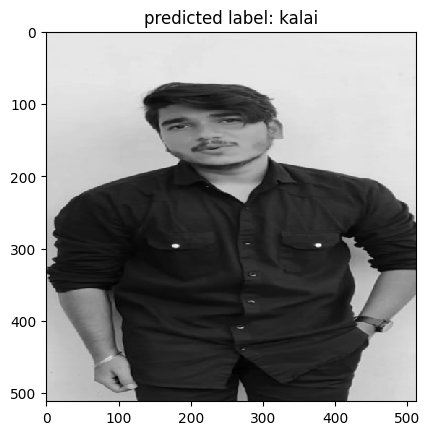

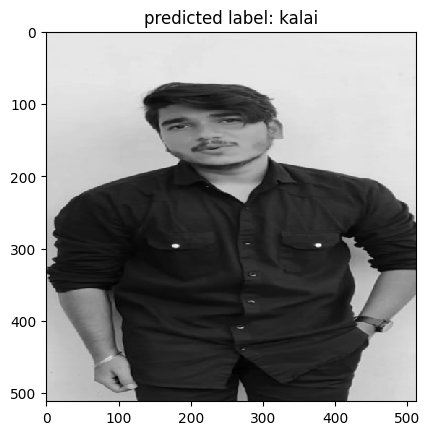

In [162]:
for i in (np.random.randint(4,5,2)):
 predicted_images = (np.reshape(x_test[i], (512,512)).astype(np.float64))
 plt.title('predicted label: {0}'. format(y_pred[i]))
 plt.imshow(predicted_images, interpolation='nearest', cmap='gray')
 plt.show()

In [145]:
from sklearn import metrics


accuracy=metrics.accuracy_score(y_test,y_pred)

accuracy

0.6666666666666666

In [146]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[2, 0, 0],
       [0, 2, 0],
       [2, 0, 0]])